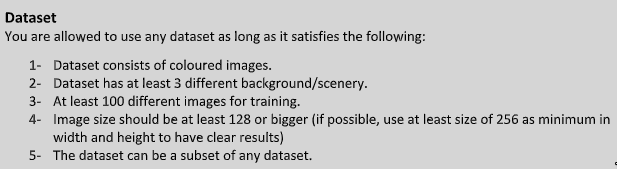

In [2]:
from keras.utils import image_dataset_from_directory
import numpy as np
from matplotlib import pyplot as plt
import pathlib
import random
import keras 
import tensorflow as tf
from keras import layers
import PIL
import cv2

In [3]:
encoding_dim=32
batch_size = 32
img_height = 256
img_width = 256
channels=3
# img_shape=img_height*img_width*channels

In [4]:
train='./Cats/train/'
test='./Cats/test/'
test_path=pathlib.Path(test)
train_path=pathlib.Path(train)

In [5]:
custom_images='/custom_images/'
custom_path=pathlib.Path(custom_images)
custom_imgs_dirs=len(list(custom_path.glob('*/*.jpg')))
print(custom_imgs_dirs)

0


In [29]:
list(custom_path.glob('*/*.jpg'))

[]

In [30]:
image_train = len(list(train_path.glob('*/*.jpg')))
image_test = len(list(test_path.glob('*/*.jpg')))
print(image_train,image_test)

265 40


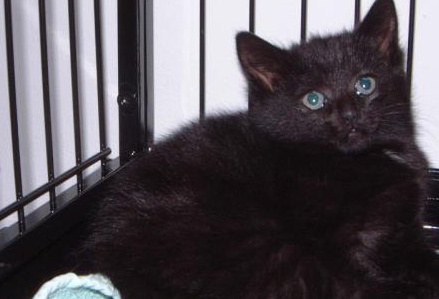

In [31]:
# list dirs of images to preprocess on them
cats_train = list(train_path.glob('*/*'))
cats_test = list(test_path.glob('*/*'))
PIL.Image.open(str(cats_train[0]))

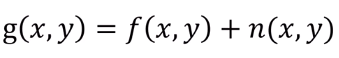
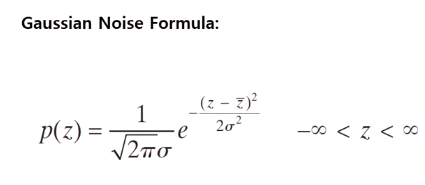

In [32]:
def preprocess_images(list_of_img_dirs):
    img_size=(256, 256)
    mean=0
    variance=0.01
    sigma=np.sqrt(variance)
    n=np.random.normal(loc=mean,scale=sigma,size=(256, 256,3))
    plt.axis(False)
    plt.imshow(n,cmap='gray')    
    flattened_array_g=[]
    flattened_array=[]
    for dir_ in list_of_img_dirs:
        img = cv2.imread(str(dir_))
        im=cv2.resize(img,img_size)
        
        im=im/255.0
        flattened_array.append(im)
        g=im+n
        flattened_array_g.append(g)
    return np.array(flattened_array),np.array(flattened_array_g)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


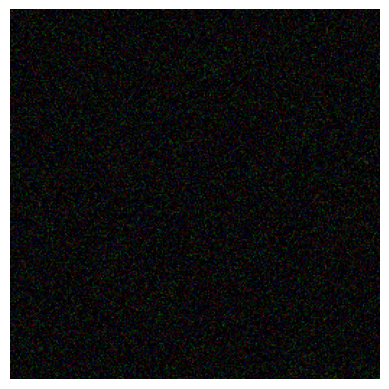

In [33]:
imgs_train,images_train_g=preprocess_images(cats_train)
imgs_test,images_test_g=preprocess_images(cats_test)

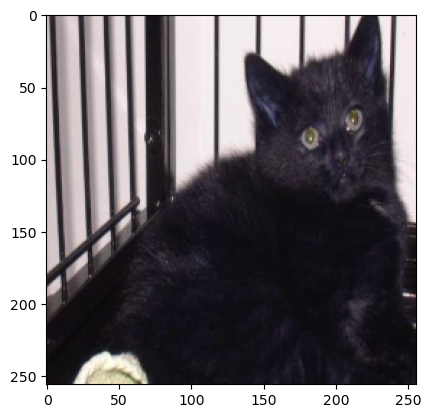

In [34]:
plt.imshow(imgs_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


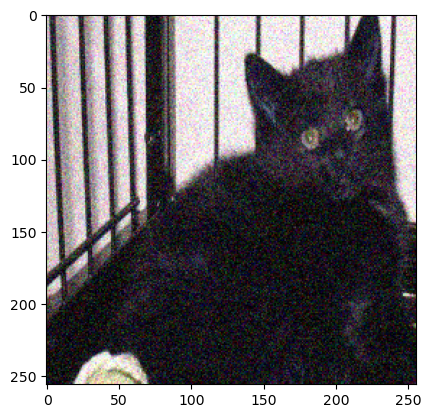

In [12]:
plt.imshow(images_train_g[0])

In [13]:
print('images for training shape',imgs_train.shape)
print('images for testing shape',imgs_test.shape)

images for training shape (265, 256, 256, 3)
images for testing shape (40, 256, 256, 3)


In [35]:
input_img = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#256x256x16
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#128x128x16
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#128x128x8
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#64x64x8
x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)
#64x64x1
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#32x32x1

x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(encoded)
# 32x32x8
x = layers.UpSampling2D((2, 2))(x)
#64x64x8
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#64x64x8
x = layers.UpSampling2D((2, 2))(x)
#128*128*8
x = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
# 128*128*16
x = layers.UpSampling2D((2, 2))(x)
# 256*256*15
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# 256*256*3

In [36]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 1)         73  

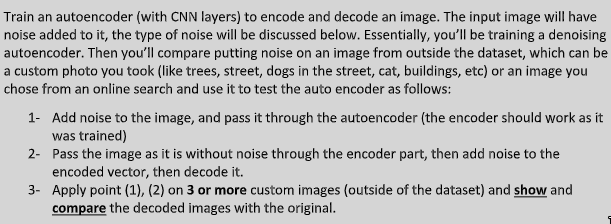

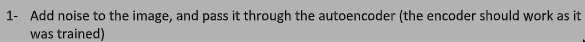

In [37]:
autoencoder.fit(images_train_g, imgs_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(images_test_g, imgs_test))

Epoch 1/50
9/9 [==============================] - 12s 1s/step - loss: 0.6927 - val_loss: 0.6916
Epoch 2/50
9/9 [==============================] - 11s 1s/step - loss: 0.6888 - val_loss: 0.6833
Epoch 3/50
9/9 [==============================] - 12s 1s/step - loss: 0.6716 - val_loss: 0.6489
Epoch 4/50
9/9 [==============================] - 11s 1s/step - loss: 0.6314 - val_loss: 0.6152
Epoch 5/50
9/9 [==============================] - 12s 1s/step - loss: 0.6083 - val_loss: 0.6026
Epoch 6/50
9/9 [==============================] - 12s 1s/step - loss: 0.5977 - val_loss: 0.5911
Epoch 7/50
9/9 [==============================] - 12s 1s/step - loss: 0.5858 - val_loss: 0.5762
Epoch 8/50
9/9 [==============================] - 11s 1s/step - loss: 0.5720 - val_loss: 0.5606
Epoch 9/50
9/9 [==============================] - 12s 1s/step - loss: 0.5619 - val_loss: 0.5519
Epoch 10/50
9/9 [==============================] - 12s 1s/step - loss: 0.5572 - val_loss: 0.5484
Epoch 11/50
9/9 [======================

In [38]:
decoded_imgs = autoencoder.predict(images_test_g)

2/2 [==============================] - 0s 63ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

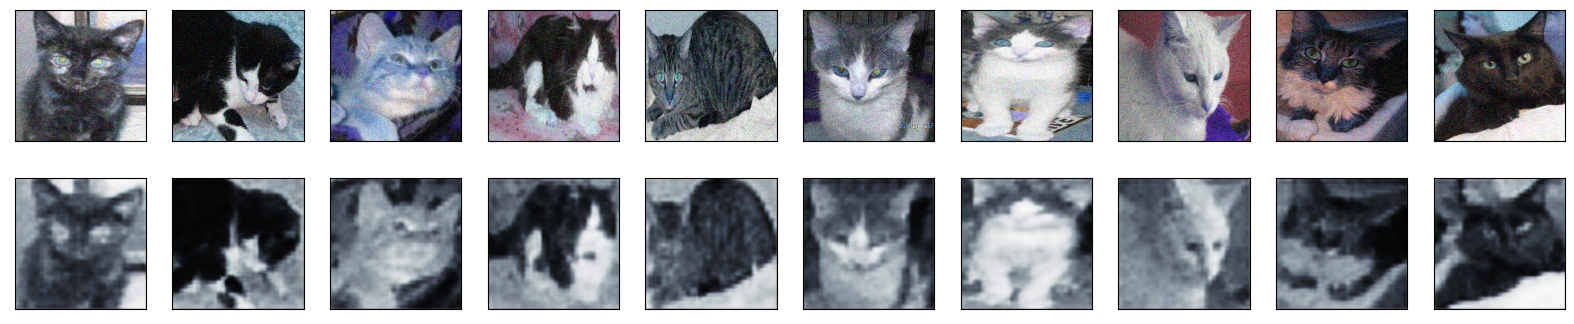

In [39]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images_test_g[i].reshape(256, 256,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

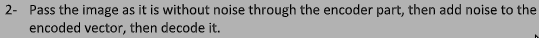

In [40]:
encoder = keras.Model(input_img, encoded)

In [41]:
#Pass the imgs without the noise
encoded_imgs = encoder.predict(imgs_test)

2/2 [==============================] - 0s 29ms/step


In [42]:
def add_noise(encoded_imgs):
    img_size=encoded_imgs.shape[1:]
    mean=0
    variance=0.01
    sigma=np.sqrt(variance)
    n=np.random.normal(loc=mean,scale=sigma,size=img_size)
    plt.axis(False)
    plt.imshow(n,cmap='gray')
    plt.title("Noise Shape")
    encoded_imgs_g=[]
    for encoded_img in encoded_imgs:   
        img=encoded_img/encoded_img.max()
        g=img+n
        encoded_imgs_g.append(g)
    return np.array(encoded_imgs_g)

(40, 32, 32, 1)


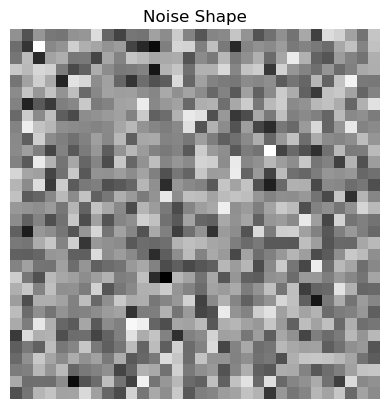

In [43]:
#Add Noise to the encoded vector
encoded_imgs_g=add_noise(encoded_imgs)
print(encoded_imgs_g.shape)

Encoded Images


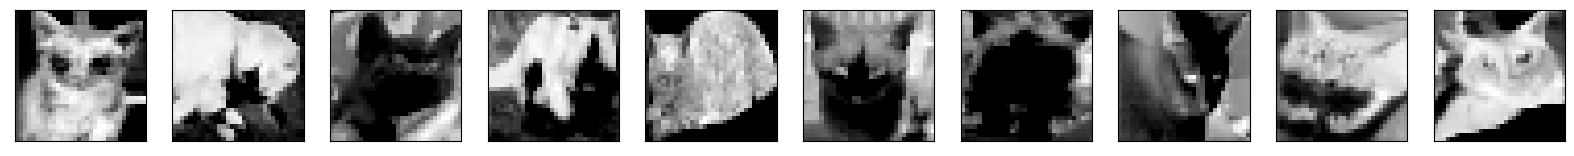

In [44]:
n = 10
plt.figure(figsize=(20, 8))
print("Encoded Images")
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].reshape((32, 32)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Encoded Images + Noise


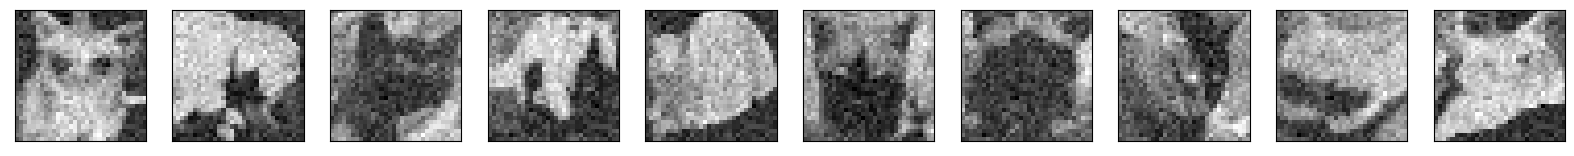

In [45]:
n = 10
plt.figure(figsize=(20, 8))
print("Encoded Images + Noise")
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)    
    plt.imshow(encoded_imgs_g[i,:,:,0].reshape((32, 32)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
#32*32*1
encoded_input = keras.Input(shape=encoded_imgs_g.shape[1:])
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
# 32*32*8
x = layers.UpSampling2D((2, 2))(x)
# 64*64*8
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# 64*64*8
x = layers.UpSampling2D((2, 2))(x)
# 128*128*8
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# 128*128*16
x = layers.UpSampling2D((2, 2))(x)
# 256*256*16
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# 256*256*3
decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 up_sampling2d_6 (UpSampling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 128, 128, 8)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      1168

In [47]:
#Assign the weight of decoder part in autoencoder to our new decoder
k = 0
for i in range (6,14):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [48]:
len(autoencoder.weights)

14

In [49]:
decoded_imgs = decoder.predict(encoded_imgs_g)

2/2 [==============================] - 0s 45ms/step


In [50]:
decoded_imgs.shape

(40, 256, 256, 3)

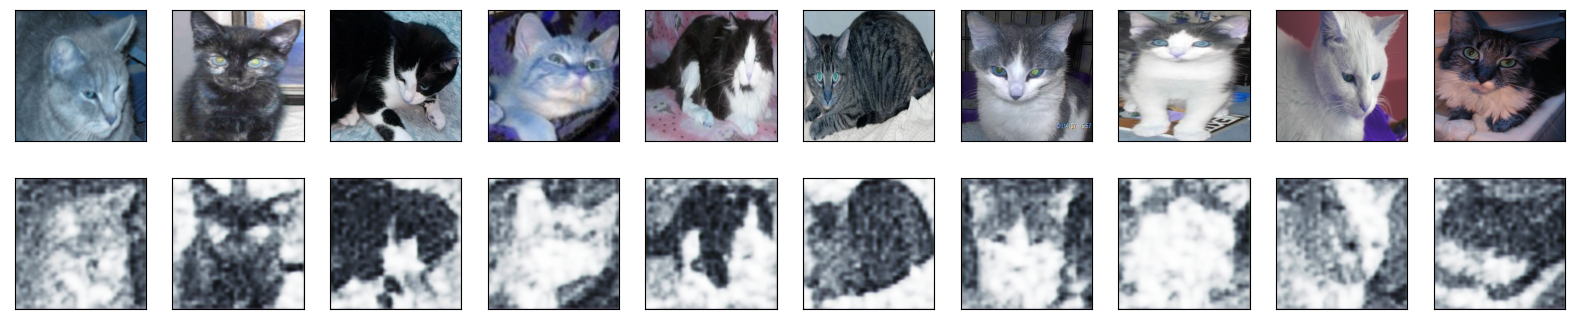

In [51]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

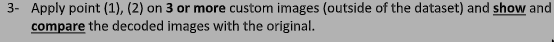

In [52]:
encoded_imgs[0].shape

(32, 32, 1)